<a href="https://colab.research.google.com/github/sudosf/Mathematical-Programming/blob/main/refresher_python_intermediate_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solve:

$\begin{cases} x+2y=1 \\ 3x+4y=2 \end{cases}$

In [ ]:
import numpy as np
A = np.array([[1, 2],[3, 4]])
b = np.array([1, 2])

print (A)
print (b)

A_inv = np.linalg.inv(A)

print (A_inv)

x = np.dot(A_inv,b)

print (x)


[[1 2]
 [3 4]]
[1 2]
[[-2.   1. ]
 [ 1.5 -0.5]]
[  2.22044605e-16   5.00000000e-01]


# CONTROL EXECUTIONS
For the control of the execution of a program it is possible to use the tests of conditions with $if / elif / else$ and the loops $for or while$. Note the use of: before lines that require a higher level of indentation (and mandatory!):

In [ ]:
list0 = range(6)

for value in list0:
    if value in [0, 2, 4]:
        # "break" leave the loop without considering "else"
        # "continue" continue with the next iteration 
        continue
    else:
        print (value, 'odd')


(1, 'odd')
(3, 'odd')
(5, 'odd')


In [ ]:
i = 5

while (i>0):
    print (i)
    i=i-1

5
4
3
2
1


There is no $switch$ equivalent in Python, you have to use $if / elif / else$:

In [ ]:
if list0[1]==0:
    print('list0[1] is 0')
elif list0[1]==1:
    print ('list0[1] is 1')
else:
    print('?')
    
    

list0[1] is 1


Python offers standard exception handling. The following example shows the syntax to use.

In [ ]:
def autreFonction(n):
        try:  # instruction susceptible to raise an  exception
            print(1 / n)
        except ZeroDivisionError:  # if the exception is raised
            print('Division by 0 !')
        else:  # else
            print ('we are here')
        finally:
            # exécuté après le bloc "try" et le
            #  traitement des éventuelles erreurs
            print('    End...')

In [ ]:
autreFonction(1)

1
we are here
    End...


In [ ]:
autreFonction(0)

Division by 0 !
    End...


In [ ]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

t = np.arange(11)
sine = np.sin(t)

#creating our quadratic interpolation subfunction

F_sine = interpolate.interp1d(t,sine,kind='quadratic')

# second time axis on which we interpolate

t2 = np.arange(0, 10., .25)


sine2 = F_sine(t2)

plt.plot(t, sine, 'rx-')
plt.plot(t2, sine2, 'bd-')
plt.show()


<Figure size 640x480 with 1 Axes>

# Difference Formulas for the Derivative

There are 3 mains difference formulas for numerically approximating derivatives.

The $forward$ difference formula with step size $h$ is

# $f^\prime (a)\approx \frac{f(a+h)-f(a)}{h}$

The $backward$ difference formula with step size $h$ is

# $f^\prime (a)\approx \frac{f(a)-f(a-h)}{h}$


The $central$ difference formula with step size $h$ is the average of the $forward$ and $backwards$ difference formulas
# $f^\prime (a)\approx \frac{1}{2}\Bigg(\frac{f(a+h)-f(a)}{h}+\frac{f(a)-f(a-h)}{h}\Bigg)=\frac{f(a+h)-f(a-h)}{2h}$


Let's write a function called derivative which takes input parameters $f, a$, $method$ and $h$ (with default values $method='central'$ and $h=0.01$) and returns the corresponding difference formula for $f^\prime(a)$ with step size $h$.




In [ ]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

Let's test our function on some simple functions. For example, we know

# $\frac{d}{dx}cos (x)=-sin(0)=0$, for $x = 0$

In [ ]:
derivative(np.cos, 0, method='forward', h=1e-8)

0.0

We also know

# $\frac{d}{dx}e^{x}=e^{0}=1$

In [ ]:
print (derivative(np.exp,0,h=0.00001))

print (derivative(np.exp,0,method='backward',h=0.0001))

1.00000000001
0.999950001667


Notice that our function can take an array of inputs 
for  $a$ and return the derivatives for each $a$ value. For example, we can plot the derivative of $sin(x)$:

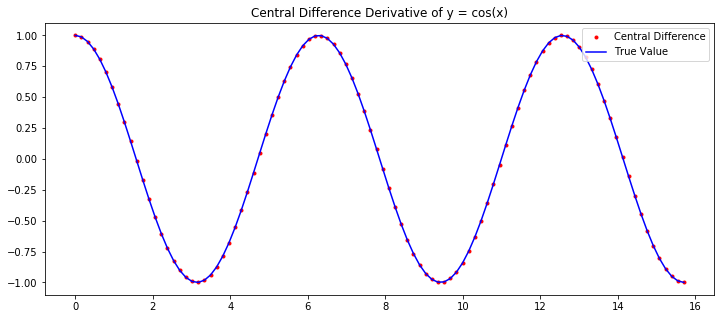

In [ ]:
x = np.linspace(0,5*np.pi,100)
dydx = derivative(np.sin,x)

dYdx = np.cos(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Central Difference Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()

Let's compute and plot the derivative of a complicated function

# $y=\Bigg( \frac{4x^2+2x+1}{x+2e^x}\Bigg)^x$

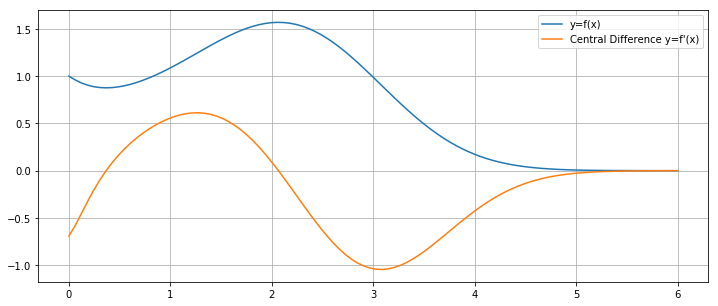

In [ ]:
x = np.linspace(0,6,100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = derivative(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Central Difference y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()

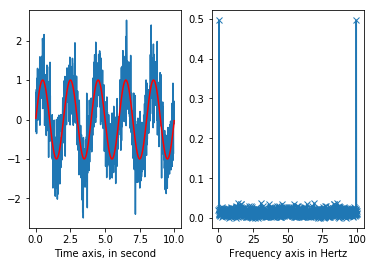

In [ ]:
from scipy import fftpack

# sampling frequency
fe = 100

# time period in second

T = 10

# nomber of points or data nuber of sample
N = T*fe

# step times
t = np.arange(1.,N)/fe

# signal frequency
f0 = 0.5

# signal 
sine = np.sin(2*np.pi*f0*t)

# add noise
bruit = np.random.normal(0,0.5,N-1)
sine2 = sine + bruit
# Fourrier transform
fourier = fftpack.fft(sine2)/np.size(sine2)
# step frequency
axe_f = np.arange(0.,N-1)*fe/N
# On plot
plt.figure()
plt.subplot(121)
plt.plot(t,sine2,'-')
plt.plot(t,sine,'r-')
plt.xlabel('Time axis, in second')
plt.subplot(122)
plt.plot(axe_f,np.abs(fourier),'x-')
plt.xlabel('Frequency axis in Hertz')
plt.show()


